# Import Dependencies

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

# Datasets

## Training Data

In [2]:
df = pd.read_csv("../datasets/stock/ZOMATO_2023.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,60.650002,60.700001,59.799999,60.299999,60.299999,18759536
1,2023-01-03,58.849998,59.549999,57.299999,58.950001,58.950001,49702768
2,2023-01-04,58.400002,58.700001,56.000000,56.349998,56.349998,48975781
3,2023-01-05,56.950001,57.099998,55.599998,56.200001,56.200001,34448671
4,2023-01-06,56.200001,56.400002,54.950001,55.250000,55.250000,30272416


In [4]:
df.set_index('Date',inplace=True)

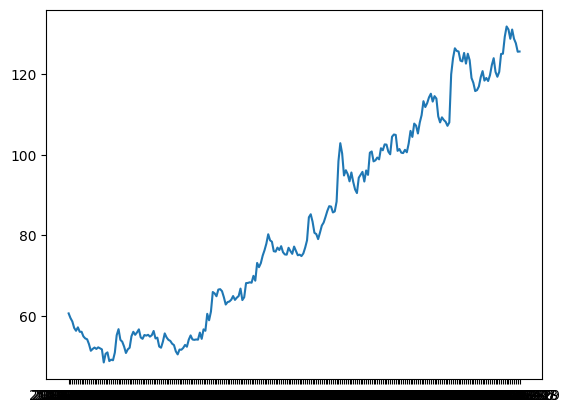

In [5]:
plt.plot(df.index,df['High'])

## Make testing data

In [8]:
base = datetime.datetime.today() + datetime.timedelta(days=30)
date_list = [base - datetime.timedelta(days=x) for x in range(204)]

In [9]:
test = []
time = 245
for i in date_list[::-1]:
    test.append([str(i)[:10],time])
    time+=1

In [10]:
test = pd.DataFrame(test, columns=['Date','Time'])
test.set_index('Date',inplace=True)
test = test.loc[:, ['Time']] 

# Model Training

## Linear regression

In [6]:
df['Time'] = np.arange(len(df.index))

X = df.loc[:, ['Time']] 
y = df.loc[:, 'High'] 

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

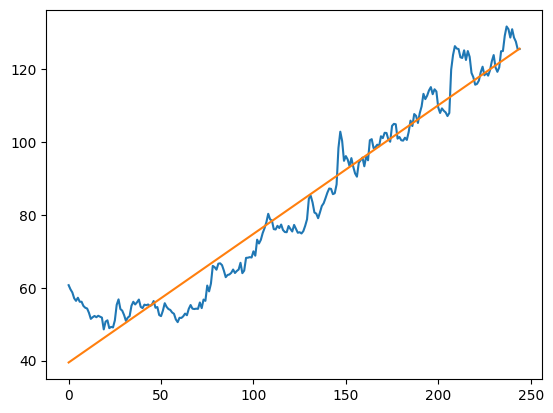

In [7]:
plt.plot(X,y)
plt.plot(X,y_pred)

### Make Prediction

In [11]:
test_pred = pd.Series(model.predict(test), index=test.index)

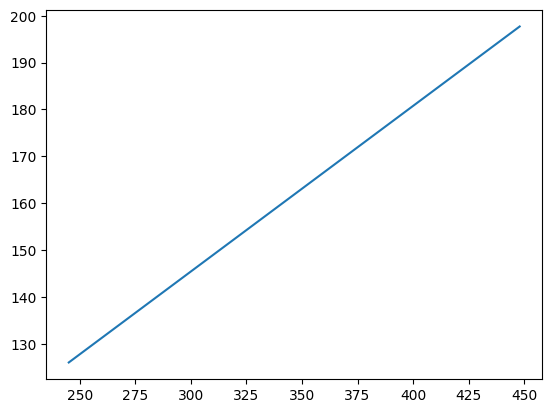

In [12]:
plt.plot(test['Time'],test_pred)

## SVM Regressor

In [15]:
svmReg = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [16]:
svmReg.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

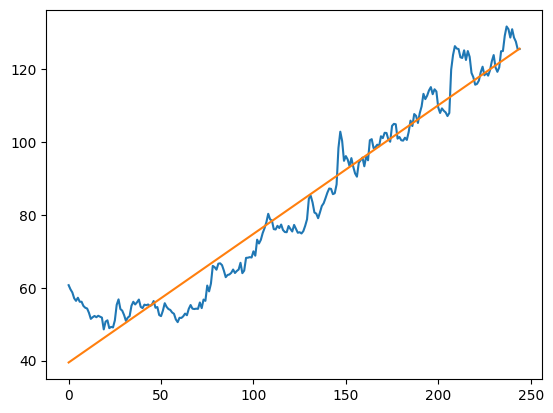

In [17]:
plt.plot(X,y)
plt.plot(X,y_pred)

### Make Predictions

In [18]:
test_pred = pd.Series(model.predict(test), index=test.index)

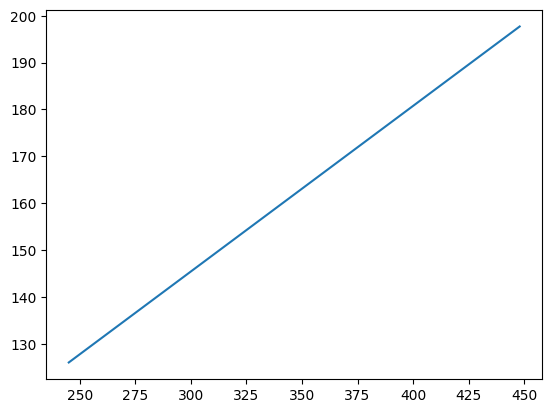

In [19]:
plt.plot(test['Time'],test_pred)

## Polynomial Regression

Polynomial feature creation :

In [63]:
poly = PolynomialFeatures(degree=2)
xPoly = poly.fit_transform(X)

Model training :

In [64]:
model = LinearRegression()
model.fit(xPoly, y)

LinearRegression()

In [65]:
y_pred = pd.Series(model.predict(xPoly), index=X.index)

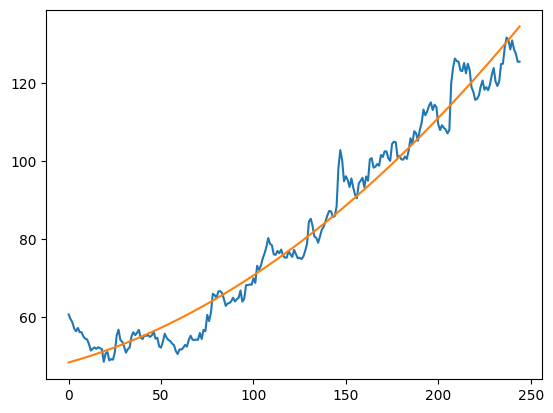

In [66]:
plt.plot(X,y)
plt.plot(X,y_pred)

Make prediction :

In [67]:
test_pred = pd.Series(model.predict(poly.transform(test)), index=test.index)

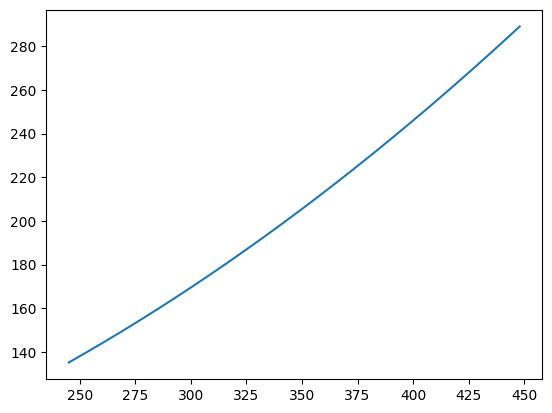

In [68]:
plt.plot(test['Time'],test_pred)